In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.4 MB/s eta 0:00:00


In [ ]:
!pip install paddleocr

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="HCtDVHQ4Yd807WadNtfd")
project = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e")
version = project.version(11)
dataset = version.download("yolov8")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 48.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to License-Plate-Recognition-11 in yolov8:: 100%|██████████| 20262/20262 [00:02<00:00, 6850.52it/s]


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

model.train(
    data='/content/License-Plate-Recognition-11/data.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    name='yolo_car_plate_copied'
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.204 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/License-Plate-Recognition-11/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=Fals

KeyboardInterrupt: 

# Test photo

In [ ]:

model = YOLO('/content/runs/detect/yolo_car_plate_copied/weights/last.pt')

results = model.predict(source="/content/License-Plate-Recognition-11/test/images/001cdd25e148cd36_jpg.rf.3921d4ff1d51af107666bc7ef7bd45b1.jpg", save=True, save_crop=True)



# OCR video

In [ ]:
import cv2
from ultralytics import YOLO
from paddleocr import PaddleOCR


model = YOLO('/content/runs/detect/yolo_car_plate_copied/weights/best.pt')

ocr = PaddleOCR(use_angle_cls=True, lang='en')

# مسارات الفيديو
video_path = "/content/12522518_2160_3840_30fps.mp4"
output_path = "output_detected.mp4"

cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    results = model.predict(frame, conf=0.5, verbose=False)

    for r in results:
        boxes = r.boxes.xyxy.cpu().numpy()
        for box in boxes:
            x1, y1, x2, y2 = map(int, box)
            crop = frame[y1:y2, x1:x2]

            if crop.size == 0:
                continue


            ocr_res = ocr.predict(crop)

            text = ""
            if ocr_res is not None and isinstance(ocr_res, list):
                for page in ocr_res:
                    for line in page["rec_texts"]:
                        text += line + " "


            cv2.rectangle(frame, (x1, y1), (x2, y2), (0,255,0), 2)
            cv2.putText(frame, text.strip(), (x1, y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,255), 2)

    out.write(frame)

cap.release()
out.release()

print("Result saved", output_path)

/tmp/ipython-input-4255079571.py:9: DeprecationWarning: The parameter `use_angle_cls` has been deprecated and will be removed in the future. Please use `use_textline_orientation` instead.
  ocr = PaddleOCR(use_angle_cls=True, lang='en')  # غيّر lang إلى 'ar' لو عندك لوحات عربية
/usr/local/lib/python3.12/dist-packages/paddle/utils/cpp_extension/extension_utils.py:718: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_doc_ori`.
Creating model: ('UVDoc', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/UVDoc`.
Creating model: ('PP-L

✅ تم الانتهاء! الفيديو الناتج محفوظ في: output_detected.mp4


In [ ]:
from paddleocr import PaddleOCR
import os

# Initialize PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, lang='en')

# Path to cropped plates
crop_dir = "/content/runs/detect/predict/crops/License_Plate/002519f868563098_jpg.jpg"

for crop_file in os.listdir(crop_dir):
    if crop_file.endswith(".jpg") or crop_file.endswith(".png"):
        img_path = os.path.join(crop_dir, crop_file)
        result = ocr.ocr(img_path, cls=True)

        print(f"🔹 Results for {crop_file}:")
        for line in result[0]:
            text = line[1][0]
            conf = line[1][1]
            print(f"   Text: {text}, Confidence: {conf:.2f}")

In [ ]:
!pip install ultralytics paddleocr paddlepaddle opencv-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.0/189.0 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 123.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 109.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 k

/tmp/ipython-input-2160488130.py:10: DeprecationWarning: The parameter `use_angle_cls` has been deprecated and will be removed in the future. Please use `use_textline_orientation` instead.
  ocr = PaddleOCR(use_angle_cls=True, lang='en')
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_doc_ori`.
Creating model: ('UVDoc', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/UVDoc`.
Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_textline_ori`.
Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_m

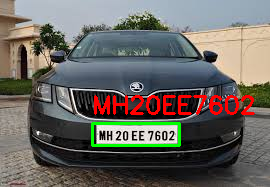

In [ ]:
import cv2
from ultralytics import YOLO
from paddleocr import PaddleOCR
from google.colab.patches import cv2_imshow  # <-- important for Colab

# Load YOLO
model = YOLO('/content/best (7).pt')

# Initialize OCR
ocr = PaddleOCR(use_angle_cls=True, lang='en')

# Test image
image_path = "/content/download (4).jpeg"
frame = cv2.imread(image_path)

# YOLO detection
results = model.predict(frame, conf=0.5, verbose=False)

for r in results:
    boxes = r.boxes.xyxy.cpu().numpy()
    for box in boxes:
        x1, y1, x2, y2 = map(int, box)
        crop = frame[y1:y2, x1:x2]

        if crop.size == 0:
            continue

        # OCR
        ocr_res = ocr.predict(crop)
        text = ""
        if ocr_res and isinstance(ocr_res, list):
            for page in ocr_res:
                for line in page["rec_texts"]:
                    text += line + " "

        # Draw box + text
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0,255,0), 2)
        cv2.putText(frame, text.strip(), (x1, y1-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,255), 2)

# Show image in Colab
cv2_imshow(frame)



In [3]:
# Install dependencies (if not installed yet)
# !pip install ultralytics paddleocr paddlepaddle opencv-python

import cv2
from ultralytics import YOLO
from paddleocr import PaddleOCR
from google.colab.patches import cv2_imshow  # for displaying frames in Colab

# -----------------------------
# 1. Load YOLO and OCR models
# -----------------------------
yolo_model = YOLO("/content/best (7).pt")  # your trained YOLO model
ocr = PaddleOCR(use_angle_cls=True, lang='en')  # use 'ar' if plates are Arabic

# -----------------------------
# 2. Paths
# -----------------------------
input_video_path = "/content/12522518_2160_3840_30fps.mp4"
output_video_path = "/content/video_annotated.mp4"

# -----------------------------
# 3. Open video
# -----------------------------
cap = cv2.VideoCapture(input_video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# -----------------------------
# 4. Process video frame by frame
# -----------------------------
frame_num = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame_num += 1

    # YOLO detection
    results = yolo_model.predict(frame, conf=0.5, verbose=False)

    for r in results:
        boxes = r.boxes.xyxy.cpu().numpy()  # detected boxes
        for box in boxes:
            x1, y1, x2, y2 = map(int, box)
            crop = frame[y1:y2, x1:x2]

            if crop.size == 0:
                continue

            # OCR on the cropped plate
            ocr_res = ocr.predict(crop)
            text = ""
            if ocr_res and isinstance(ocr_res, list):
                for page in ocr_res:
                    for line in page["rec_texts"]:
                        text += line + " "

            # Draw bounding box and recognized text
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0,255,0), 2)
            cv2.putText(frame, text.strip(), (x1, y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,255), 2)

    # Write frame to output video
    out.write(frame)

    # Optional: display every 20th frame in Colab
    if frame_num % 20 == 0:
        cv2_imshow(frame)

# -----------------------------
# 5. Release resources
# -----------------------------
cap.release()
out.release()
cv2.destroyAllWindows()

print("✅ Done! Annotated video saved at:", output_video_path)


Output hidden; open in https://colab.research.google.com to view.

In [4]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to save the video in your Google Drive
# You can change 'My Drive/output_videos' to your desired folder
drive_output_path = '/content/drive/My Drive/output_videos'
os.makedirs(drive_output_path, exist_ok=True)

# Define the path of the video generated in the previous cell
# Make sure this matches the output_video_path in the previous cell
local_video_path = "/content/video_annotated.mp4" # or "output_video.mp4" depending on which cell was used

# Define the destination path in Google Drive
video_filename = os.path.basename(local_video_path)
destination_path = os.path.join(drive_output_path, video_filename)

# Copy the video to Google Drive
!cp "{local_video_path}" "{destination_path}"

print(f"✅ Video saved to Google Drive at: {destination_path}")

Mounted at /content/drive
✅ Video saved to Google Drive at: /content/drive/My Drive/output_videos/video_annotated.mp4


In [ ]:
import cv2
from ultralytics import YOLO
from paddleocr import PaddleOCR

# Load model
model = YOLO('/content/best (7).pt')
ocr = PaddleOCR(use_angle_cls=True, lang='en')

video_path = "/content/12522518_2160_3840_30fps.mp4"
output_path = "output_video.mp4"

cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # YOLO detection
    results = model.predict(frame, conf=0.5, verbose=False)

    for r in results:
        boxes = r.boxes.xyxy.cpu().numpy()
        for box in boxes:
            x1, y1, x2, y2 = map(int, box)
            crop = frame[y1:y2, x1:x2]

            if crop.size == 0:
                continue

            # OCR
            ocr_res = ocr.predict(crop)
            text = ""
            if ocr_res and isinstance(ocr_res, list):
                for page in ocr_res:
                    for line in page["rec_texts"]:
                        text += line + " "

            # Draw box + text
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0,255,0), 2)
            cv2.putText(frame, text.strip(), (x1, y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,255), 2)

    out.write(frame)

cap.release()
out.release()
cv2.destroyAllWindows()

print("✅ Video processing complete! Output saved at:", output_path)


/tmp/ipython-input-1927863201.py:7: DeprecationWarning: The parameter `use_angle_cls` has been deprecated and will be removed in the future. Please use `use_textline_orientation` instead.
  ocr = PaddleOCR(use_angle_cls=True, lang='en')
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_doc_ori`.
Creating model: ('UVDoc', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/UVDoc`.
Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_textline_ori`.
Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_mo

✅ Video processing complete! Output saved at: output_video.mp4
